In [5]:
import numpy as np
import pandas as pd
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import folium

###### 한글 깨지는 것 막기
import matplotlib.font_manager as fm
# 폰트 이름 뽑기
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]=False


# 플롯 스타일 
#plt.style.use("fivethirtyeight")

# 크롤링
# BeautifulSoup
from bs4 import BeautifulSoup
# urllib
import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
# Selenium 웹드라이버
from selenium import webdriver
import requests

# 에러 경고 안뜨게 하기
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm_notebook

#중간중간 1초 정도 간격을 두고 다운로드 받도록 설정
import time

# pip install mglearn
import mglearn

# scikit-learn 샘플
from sklearn.datasets import load_breast_cancer, load_boston, make_blobs, load_iris, load_digits
from sklearn.datasets import make_classification, make_moons, load_wine, load_diabetes


# KNN
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# 선형모델 알고리즘
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

# SVM 알고리즘
from sklearn.svm import LinearSVC, SVR, SVC

###########################################################################################
# 훈련용 데이터와 테스트용 데이터를 알아서 분류해주는 라이브러리
from sklearn.model_selection import train_test_split
# Cross Validation KFold 
from sklearn.model_selection import KFold
# 계층화
from sklearn.model_selection import StratifiedKFold
# 교차 검증 함수
from sklearn.model_selection import cross_val_score, cross_validate
# 교차 검증 및 하이퍼 파라미터 튜닝 함수
from sklearn.model_selection import GridSearchCV
#############################################################################################

# 예측값이 얼만큼 맞았는가 확인해주는 함수
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, roc_curve

from sklearn.base import BaseEstimator

from numpy import linalg

# 레이블 인코딩(더미변수), 원-핫 인코더
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 표준화, 정규화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# feature_extraction 
from sklearn.feature_extraction.text import CountVectorizer 

################################################################################################
#의사결정 나무
from sklearn.tree import DecisionTreeClassifier
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# 경사하강법
from sklearn.ensemble import GradientBoostingClassifier
# Voting Classifier
from sklearn.ensemble import  VotingClassifier
#################################################################################################

#################################################################################################
# NaiveBayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
#################################################################################################

#################################################################################################
# Clustering
from sklearn.cluster import KMeans
#################################################################################################

#################################################################################################
# Perceptron
from sklearn.linear_model import Perceptron

# MLPClassifier
from sklearn.neural_network import MLPClassifier
##################################################################################################

# XGBoost
import xgboost as xgb    # 설치 conda install -c anaconda py-xgboost
from xgboost import XGBClassifier, XGBRegressor # wrapping class
from xgboost import plot_importance, plot_tree

# LightGBM
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

# Graphviz
from sklearn.tree import export_graphviz
import graphviz

##### 통계적 접근
from scipy import stats

# 통계 모델
import statsmodels.api as sm

# 학습한 모델 저장
import pickle, joblib

# 야후 파이낸스
from pandas_datareader import data as pdr
import yfinance as yf

In [10]:
yf.pdr_override()


studio = pdr.get_data_yahoo('352820.KS', start='2021-01-02')
studio.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,158116.515625,158610.62500,154163.609375,156140.062500,156140.062500,154747
2021-01-05,155151.828125,157128.28125,153669.484375,156634.171875,156634.171875,170974
2021-01-06,158116.515625,159104.75000,155645.953125,156634.171875,156634.171875,149959
2021-01-07,156634.171875,157622.40625,155151.828125,155151.828125,155151.828125,141526
2021-01-08,156140.062500,160092.96875,153175.375000,158610.625000,158610.625000,288730


In [16]:
tmp_studio=studio.drop(columns='Volume')

In [18]:
tmp_studio.head(10)

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-01-04,158116.515625,158610.625000,154163.609375,156140.062500,156140.062500
2021-01-05,155151.828125,157128.281250,153669.484375,156634.171875,156634.171875
2021-01-06,158116.515625,159104.750000,155645.953125,156634.171875,156634.171875
2021-01-07,156634.171875,157622.406250,155151.828125,155151.828125,155151.828125
2021-01-08,156140.062500,160092.968750,153175.375000,158610.625000,158610.625000
2021-01-11,160092.968750,160587.093750,152187.140625,152681.265625,152681.265625
2021-01-12,152681.265625,155151.828125,148234.234375,151693.031250,151693.031250
2021-01-13,151693.031250,177881.078125,151198.921875,166516.453125,166516.453125
2021-01-14,164540.000000,168492.906250,161575.312500,164045.890625,164045.890625


In [21]:
tmp_studio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2021-01-04 to 2021-08-13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       155 non-null    float64
 1   High       155 non-null    float64
 2   Low        155 non-null    float64
 3   Close      155 non-null    float64
 4   Adj Close  155 non-null    float64
dtypes: float64(5)
memory usage: 12.3 KB


In [22]:
tmp_studio.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13'],
              dtype='datetime64[ns]', name='Date', length=155, freq=None)

No handles with labels found to put in legend.


AttributeError: module 'matplotlib.pyplot' has no attribute 'size'

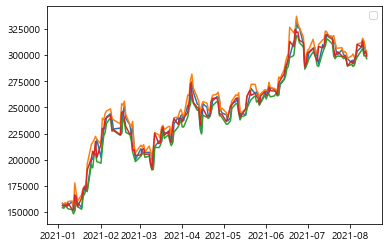

In [33]:
plt.plot(tmp_studio.index, tmp_studio[["Open", "High", "Low", "Close"]])
plt.legend(loc="best")


In [34]:
# 종가 일간 변동률
studio_npc= (studio["Close"]-studio["Close"].shift(1))/studio["Close"].shift(1)*100
studio_npc.head()

Date
2021-01-04         NaN
2021-01-05    0.316453
2021-01-06    0.000000
2021-01-07   -0.946373
2021-01-08    2.229298
Name: Close, dtype: float64

In [35]:
studio_npc.iloc[0]=0

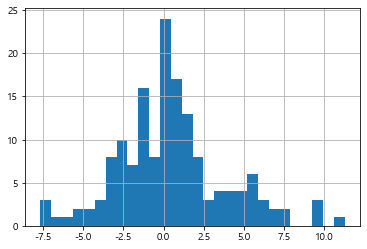

In [38]:
# 종가 변동률 히스토그램
plt.hist(studio_npc, bins=28)
plt.grid(True)
plt.show()

In [39]:
# 종가 변동률 누적합
studio_npc.cumsum()

Date
2021-01-04     0.000000
2021-01-05     0.316453
2021-01-06     0.316453
2021-01-07    -0.629920
2021-01-08     1.599378
                ...    
2021-08-09    76.673246
2021-08-10    78.458961
2021-08-11    74.471720
2021-08-12    75.302285
2021-08-13    73.819583
Name: Close, Length: 155, dtype: float64

In [ ]:
# Maximum Drawdown(최대손실 낙폭)
# 특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실
# rolling() 
